### Fig. 4  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches
import random as ra
from matplotlib import font_manager 
font_path = "/mnt/cyy14/data_qg/old_draw/font"
font_files = font_manager.findSystemFonts(fontpaths=font_path)
for file in font_files:
    font_manager.fontManager.addfont(file)
plt.rcParams["font.sans-serif"] = "Arial"


In [2]:
def draw_text(text):
    textx=0.02
    texty=0.98
    #textx=0.06
    #texty=0.96
    textpad='round,pad=0.2'
    
    plt.text(textx,texty, s = text, zorder=9999999, verticalalignment='top', horizontalalignment='left',\
fontsize=15, transform=ax.transAxes, bbox=dict(boxstyle=textpad, fc='white', ec='k',lw=1 ,alpha=0.7))
    
    return text

observer_list = np.load('/mnt/cyy14/data_ANON_UID_compare/observers/\
2019080910-2019081110_117.2-123.2_27.3-33.3_observers_list.npy')

In [ ]:
users=9

user_x=[]
user_y=[]
ua_x=[]
ua_y=[]
for i in range(users):
    move_x=ra.uniform(0.05, 0.25)
    move_y=ra.uniform(0.05, 0.25)
    x1=ra.random()/3+(i%3)/3
    y1=ra.random()/3+(i//3)/3
    ob_x=[x1]
    ob_y=[y1]
    ob_len=ra.randint(3,15)
    for j in range(ob_len):
        while True:
            x1=ob_x[-1]+move_x*ra.uniform(-1, 1)
            y1=ob_y[-1]+move_y*ra.uniform(-1, 1)
            if 0<x1<1 and 0<y1<1:
                break
        ob_x.append(x1)
        ob_y.append(y1)
    user_x.append(ob_x)
    user_y.append(ob_y)
    ua_x=ua_x+ob_x
    ua_y=ua_y+ob_y

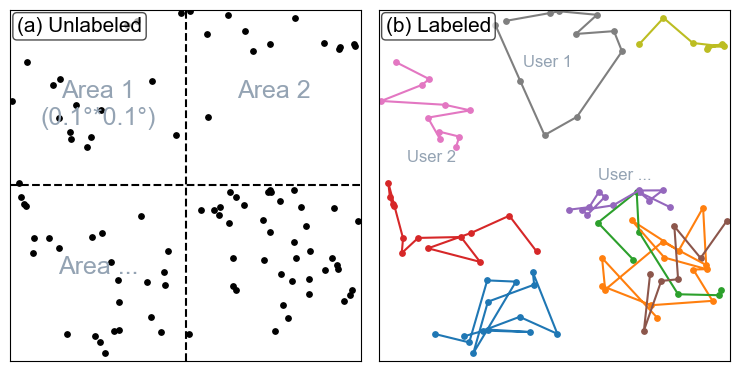

In [ ]:
fig = plt.figure(tight_layout=True)
fig.set_size_inches(12, 6)
gs = gridspec.GridSpec(1, 2)
plt.subplots_adjust(wspace = 0.05, hspace = 0.05)
plt.subplots_adjust(left=0.20, right=0.80, top=0.80, bottom=0.20)
plt.tight_layout() # --qg

sx=[]
sy=[]
for i in range(5):
    sx.append(ra.random())
    sy.append(ra.random())

c_bot='#94a3b3'

# (a)
ax = fig.add_subplot(gs[0, 0])
ax.set_aspect(1)
plt.sca(ax)

plt.scatter(ua_x,ua_y, s=15, color='black')
#plt.scatter(sx,sy, s=30, color='black', marker='^')
plt.plot([0.5, 0.5], [0, 1], 'k--')
plt.plot([0, 1], [0.5, 0.5],  'k--')
plt.xlim(0,1)
plt.ylim(0,1)
plt.xticks([])
plt.yticks([])
#plt.ylabel('Schematic Diagram of Model Dividing')

draw_text('(a) Unlabeled')
#plt.text(0.04, 0.92, s = '(a) Unlabeled', fontsize=15, transform=ax.transAxes)
plt.text(0.25, 0.75+0.05, s = 'Area 1\n(0.1°*0.1°)', color=c_bot, fontsize=18, transform=ax.transAxes, \
         va='top', ha='center', rotation='horizontal', zorder=10)
plt.text(0.75, 0.75+0.05, s = 'Area 2', color=c_bot, fontsize=18, transform=ax.transAxes, \
         va='top', ha='center', rotation='horizontal', zorder=10)
plt.text(0.25, 0.25+0.05, s = 'Area ...', color=c_bot, fontsize=18, transform=ax.transAxes, \
         va='top', ha='center', rotation='horizontal', zorder=10)


# (b)
ax = fig.add_subplot(gs[0, 1])
ax.set_aspect(1)
plt.sca(ax)

#plt.scatter(sx,sy, s=20, color='black', marker='^')
for i in range(users):
    plt.scatter(user_x[i],user_y[i], s=15)
    plt.plot(user_x[i],user_y[i])
plt.xlim(0,1)
plt.ylim(0,1)
plt.xticks([])
plt.yticks([])

draw_text('(b) Labeled')
#plt.text(0.04, 0.92, s = '(b) Labeled', fontsize=15, transform=ax.transAxes)
plt.text(0.48, 0.85, s = 'User 1', color=c_bot, fontsize=12, transform=ax.transAxes, \
         va='center', ha='center', rotation='horizontal', zorder=-10)
plt.text(0.15, 0.58, s = 'User 2', color=c_bot, fontsize=12, transform=ax.transAxes, \
         va='center', ha='center', rotation='horizontal', zorder=-10)
plt.text(0.7, 0.53, s = 'User ...', color=c_bot, fontsize=12, transform=ax.transAxes, \
         va='center', ha='center', rotation='horizontal', zorder=-10)


fig_dir = '/mnt/cyy14/data_qg/old_draw/submit/'
plt.savefig(fig_dir + 'f04.pdf', dpi = 300, format='pdf', bbox_inches = 'tight')
